# Visualization

# Data Wrangling and Cleaning

In [2]:
# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)


In [3]:
#Checking Null values
print(df.isnull().sum())


index           0
id              0
brand           0
model           0
website         0
price           0
mileage         0
owners          0
depreciation    0
reg_date        0
coe_left        0
link            0
dtype: int64


In [4]:
cnx2 = sqlite3.connect('cars.db')

df2 = pd.read_sql_query("SELECT * FROM cars", cnx2)
df2.head()

,title,price,mileage,owners,depreciation,reg_date,coe_left,link
0,MERCEDES BENZ GLA180 (R18 BI),77000,68000,1,19896,5/1/2016,3.224658,https://www.motorist.sg/used-car/4676/mercedes...
1,LEXUS ES300H CVT,60800,156000,1,20152,23/10/2014,2.021918,https://www.motorist.sg/used-car/4675/lexus-es...
2,MERCEDES BENZ C 180 CGI,83800,131240,1,10482,12/10/2010,2.010959,https://www.motorist.sg/used-car/4674/mercedes...
3,PEUGEOT 3008 ACTIVE PURETECH 1.2 EAT6,79800,35000,1,14056,14/12/2017,5.164384,https://www.motorist.sg/used-car/4673/peugeot-...
4,HYUNDAI DM SANTA FE 2.4 GLS AT 4WD SR,70800,70731,1,19050,27/8/2015,2.865753,https://www.motorist.sg/used-car/4672/hyundai-...


In [5]:
df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,reg_date,coe_left,link
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,2012-10-10 00:00:00,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,2016-08-24 00:00:00,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,2017-11-23 00:00:00,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,2010-09-22 00:00:00,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,2020-10-15 00:00:00,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [6]:
# Removing string part from Owners and Depreciation 
df['owners'] = df['owners'].map(lambda x: x.lstrip('').rstrip('Owners'))
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('$').rstrip('/yr'))
df['depreciation'] = df['depreciation'].str.replace(',','')
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('Paper Value : $').rstrip(''))
df.head()

AttributeError: 'int' object has no attribute 'lstrip'

In [ ]:
# Converting Strings to integer columns (price	mileage	owners	depreciation)

df["price"] = pd.to_numeric(df["price"])
df["mileage"] = pd.to_numeric(df["mileage"])
df["owners"] = pd.to_numeric(df["owners"])
df["depreciation"] = pd.to_numeric(df["depreciation"])
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:
df2.head()

,title,price,mileage,owners,depreciation,reg_date,coe_left,link
0,MERCEDES BENZ GLA180 (R18 BI),77000,68000,1,19896,5/1/2016,3.224658,https://www.motorist.sg/used-car/4676/mercedes...
1,LEXUS ES300H CVT,60800,156000,1,20152,23/10/2014,2.021918,https://www.motorist.sg/used-car/4675/lexus-es...
2,MERCEDES BENZ C 180 CGI,83800,131240,1,10482,12/10/2010,2.010959,https://www.motorist.sg/used-car/4674/mercedes...
3,PEUGEOT 3008 ACTIVE PURETECH 1.2 EAT6,79800,35000,1,14056,14/12/2017,5.164384,https://www.motorist.sg/used-car/4673/peugeot-...
4,HYUNDAI DM SANTA FE 2.4 GLS AT 4WD SR,70800,70731,1,19050,27/8/2015,2.865753,https://www.motorist.sg/used-car/4672/hyundai-...


In [ ]:
# Splitting coe_left in to individual Registration and coe_left columns
df[['reg_date','coe_left']] = df.coe_left.str.split("(",expand=True)

In [ ]:
# Changing coe_left from string object to Date 
df['coe_left'] = df['coe_left'].map(lambda x: x.lstrip('').rstrip('mths left)'))
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,9yrs 5,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10 Oct 12
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,3yrs 10,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,24 Aug 16
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,5yrs 1,/cars/toyota/wish/toyota-wish-1-8a/DO85O7,23 Nov 17
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,7yrs 4,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,22 Sep 10
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,7yrs 11,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,15 Oct 20


In [ ]:
df[['coe_year','coe_months']] = df.coe_left.str.split("yrs ",expand=True)
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,coe_year,coe_months
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,9yrs 5,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10 Oct 12,9,5
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,3yrs 10,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,24 Aug 16,3,10
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,5yrs 1,/cars/toyota/wish/toyota-wish-1-8a/DO85O7,23 Nov 17,5,1
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,7yrs 4,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,22 Sep 10,7,4
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,7yrs 11,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,15 Oct 20,7,11


In [ ]:
df["coe_year"] = df['coe_year'].str.replace('yr','')

In [ ]:
df["coe_months"].unique()

array([0.41666667, 0.83333333, 0.08333333, 0.33333333, 0.91666667,
       0.25      , 0.        , 0.16666667, 0.58333333, 0.75      ,
       0.5       , 0.66666667])

In [ ]:
#Replacing nan  values
df = df.fillna(0)

In [ ]:
df["coe_year"] = pd.to_numeric(df["coe_year"])
df["coe_months"] = pd.to_numeric(df["coe_months"])
df['coe_months'] = df['coe_months'].div(12)
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,coe_year,coe_months
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,9yrs 5,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10 Oct 12,9,0.416667
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,3yrs 10,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,24 Aug 16,3,0.833333
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,5yrs 1,/cars/toyota/wish/toyota-wish-1-8a/DO85O7,23 Nov 17,5,0.083333
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,7yrs 4,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,22 Sep 10,7,0.333333
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,7yrs 11,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,15 Oct 20,7,0.916667


In [ ]:
df['coe_left']= df[['coe_year','coe_months']].sum(axis=1)

In [ ]:
df["reg_date"] = df['reg_date'].str.replace(' ','')

In [ ]:
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d%b%y')
df.head()



,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,coe_year,coe_months
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,2012-10-10,9,0.416667
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,2016-08-24,3,0.833333
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7,2017-11-23,5,0.083333
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,2010-09-22,7,0.333333
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,2020-10-15,7,0.916667


In [ ]:
df.columns

Index(['id', 'brand', 'model', 'website', 'price', 'mileage', 'owners',
       'depreciation', 'coe_left', 'link', 'reg_date', 'coe_year',
       'coe_months'],
      dtype='object')

In [ ]:
df2.head()

,title,price,mileage,owners,depreciation,reg_date,coe_left,link
0,MERCEDES BENZ GLA180 (R18 BI),77000,68000,1,19896,5/1/2016,3.224658,https://www.motorist.sg/used-car/4676/mercedes...
1,LEXUS ES300H CVT,60800,156000,1,20152,23/10/2014,2.021918,https://www.motorist.sg/used-car/4675/lexus-es...
2,MERCEDES BENZ C 180 CGI,83800,131240,1,10482,12/10/2010,2.010959,https://www.motorist.sg/used-car/4674/mercedes...
3,PEUGEOT 3008 ACTIVE PURETECH 1.2 EAT6,79800,35000,1,14056,14/12/2017,5.164384,https://www.motorist.sg/used-car/4673/peugeot-...
4,HYUNDAI DM SANTA FE 2.4 GLS AT 4WD SR,70800,70731,1,19050,27/8/2015,2.865753,https://www.motorist.sg/used-car/4672/hyundai-...


In [ ]:
df_cleaned = df[['id', 'brand', 'model', 'website', 'price', 'mileage', 'owners',
       'depreciation', 'reg_date', 'coe_left', 'link']]

In [ ]:
df_cleaned.head()

,id,brand,model,website,price,mileage,owners,depreciation,reg_date,coe_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,2012-10-10,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,2016-08-24,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,2017-11-23,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,2010-09-22,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,2020-10-15,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:
#Creating a cursor object using the cursor() method
cursor = cnx.cursor()

#Doping EMPLOYEE table if already exists
cursor.execute("DROP TABLE cars")
print("Table dropped... ")

Table dropped... 


In [ ]:
df_cleaned.to_sql(name='cars', con=cnx)

In [ ]:
df = pd.read_sql_query("SELECT * FROM cars", cnx)
df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,reg_date,coe_left,link
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,2012-10-10 00:00:00,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,2016-08-24 00:00:00,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,2017-11-23 00:00:00,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,2010-09-22 00:00:00,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,2020-10-15 00:00:00,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:

# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3 Owners,"$14,990/yr",10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1 Owner,"$19,790/yr",24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2 Owners,"$14,500/yr",23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5 Owners,"$15,870/yr",22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1 Owner,"$27,810/yr",15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:

# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)

#Checking Null values
#print(df.isnull().sum())
#df.head()
# Removing string part from Owners and Depreciation 
df['owners'] = df['owners'].map(lambda x: x.lstrip('').rstrip('Owners'))
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('$').rstrip('/yr'))
df['depreciation'] = df['depreciation'].str.replace(',','')
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('Paper Value : $').rstrip(''))
#df.head()

# Converting Strings to integer columns (price	mileage	owners	depreciation)

df["price"] = pd.to_numeric(df["price"])
df["mileage"] = pd.to_numeric(df["mileage"])
df["owners"] = pd.to_numeric(df["owners"])
df["depreciation"] = pd.to_numeric(df["depreciation"])
# df.head()

# Splitting coe_left in to individual Registration and coe_left columns
df[['reg_date','coe_left']] = df.coe_left.str.split("(",expand=True)

# Changing coe_left from string object to Date 
df['coe_left'] = df['coe_left'].map(lambda x: x.lstrip('').rstrip('mths left)'))
# df.head()
df[['coe_year','coe_months']] = df.coe_left.str.split("yrs ",expand=True)

df["coe_year"] = df['coe_year'].str.replace('yr','')
df["coe_months"].unique()
#Replacing nan  values
df = df.fillna(0)
df["coe_year"] = pd.to_numeric(df["coe_year"])
df["coe_months"] = pd.to_numeric(df["coe_months"])
df['coe_months'] = df['coe_months'].div(12)
# df.head()
df['coe_left']= df[['coe_year','coe_months']].sum(axis=1)
df["reg_date"] = df['reg_date'].str.replace(' ','')
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d%b%y')
# df.head()

# Compiling the cleaned data
df_cleaned = df[['id', 'brand', 'model', 'website', 'price', 'mileage', 'owners',
       'depreciation', 'reg_date', 'coe_left', 'link']]
df_cleaned.head()
#Creating a cursor object using the cursor() method
cursor = cnx.cursor()

#Replacing Dirty car table with clean data
cursor.execute("DROP TABLE cars")

df_cleaned.to_sql(name='cars', con=cnx)
df = pd.read_sql_query("SELECT * FROM cars", cnx)
df.head()

Table dropped... 


,index,id,brand,model,website,price,mileage,owners,depreciation,reg_date,coe_left,link
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,2012-10-10 00:00:00,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,2016-08-24 00:00:00,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,2017-11-23 00:00:00,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,2010-09-22 00:00:00,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,2020-10-15 00:00:00,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,reg_date,coe_left,link
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,2012-10-10 00:00:00,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,2016-08-24 00:00:00,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,2017-11-23 00:00:00,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,2010-09-22 00:00:00,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,2020-10-15 00:00:00,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [34]:
df.reg_date.unique()

array(['2012-10-10 00:00:00', '2016-08-24 00:00:00',
       '2017-11-23 00:00:00', '2010-09-22 00:00:00',
       '2020-10-15 00:00:00', '2018-09-25 00:00:00',
       '2011-10-10 00:00:00', '2017-01-25 00:00:00',
       '2018-08-28 00:00:00', '2021-10-29 00:00:00',
       '2022-01-14 00:00:00', '2016-12-27 00:00:00',
       '2016-02-12 00:00:00', '2015-06-19 00:00:00',
       '2022-01-24 00:00:00', '2021-03-16 00:00:00',
       '2010-07-28 00:00:00', '2020-02-19 00:00:00',
       '2015-09-09 00:00:00', '2015-10-27 00:00:00',
       '2017-12-07 00:00:00', '2019-09-18 00:00:00',
       '2017-02-16 00:00:00', '2020-12-30 00:00:00',
       '2019-10-31 00:00:00', '2010-09-29 00:00:00',
       '2016-10-26 00:00:00', '2014-10-23 00:00:00',
       '2018-05-08 00:00:00', '2007-08-17 00:00:00',
       '2018-11-19 00:00:00', '2020-12-16 00:00:00',
       '2020-11-30 00:00:00', '2020-02-28 00:00:00',
       '2016-08-18 00:00:00', '2018-11-05 00:00:00',
       '2009-06-15 00:00:00', '2019-09-03 00:0

[Text(0.5, 1.0, 'Count of cars of each Brand')]

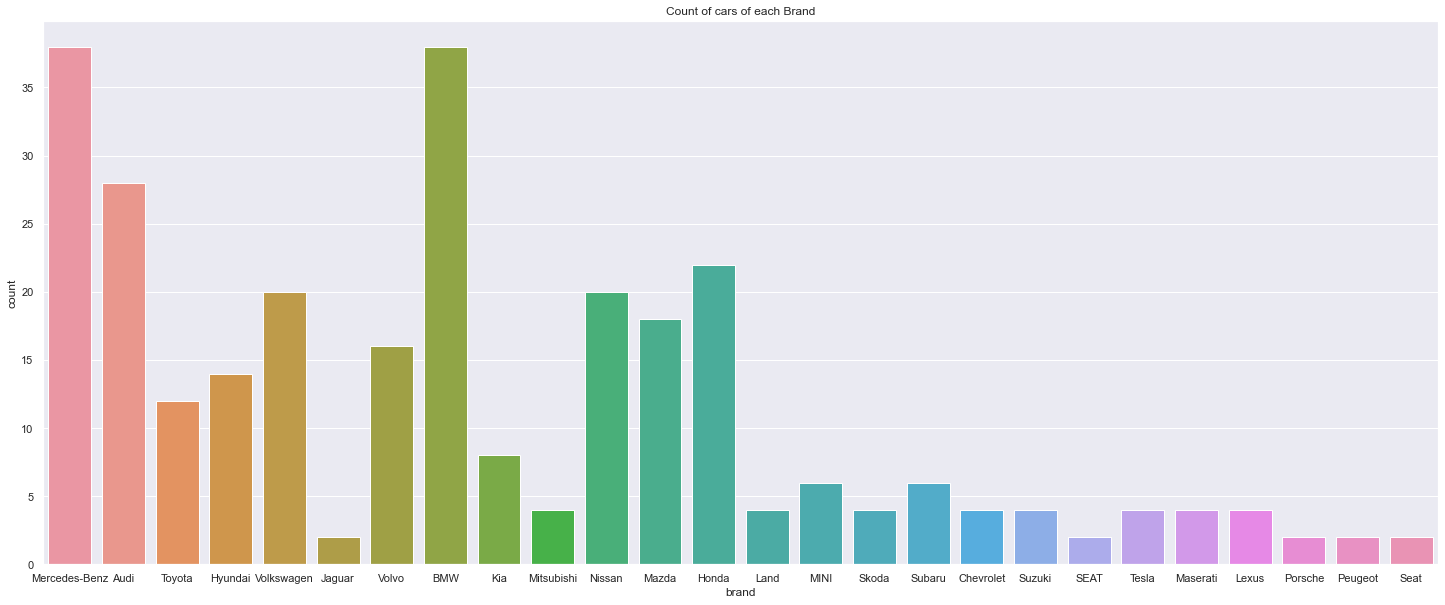

In [19]:
sns.set(rc={'figure.figsize':(25,10)})
sns.countplot(x="brand", data=(df)).set(title='Count of cars of each Brand')

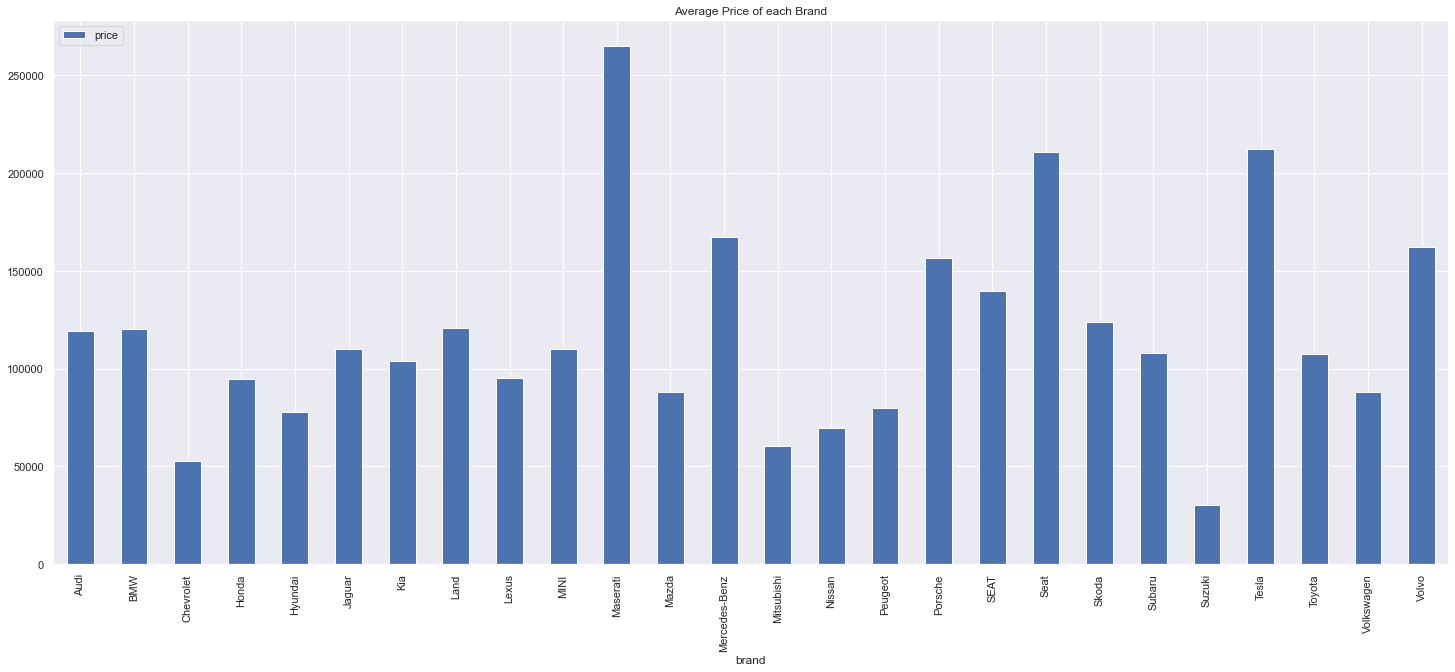

In [28]:
df.groupby('brand')['price'].mean().plot.bar()
plt.title('Average Price of each Brand')
plt.legend(loc="upper left")

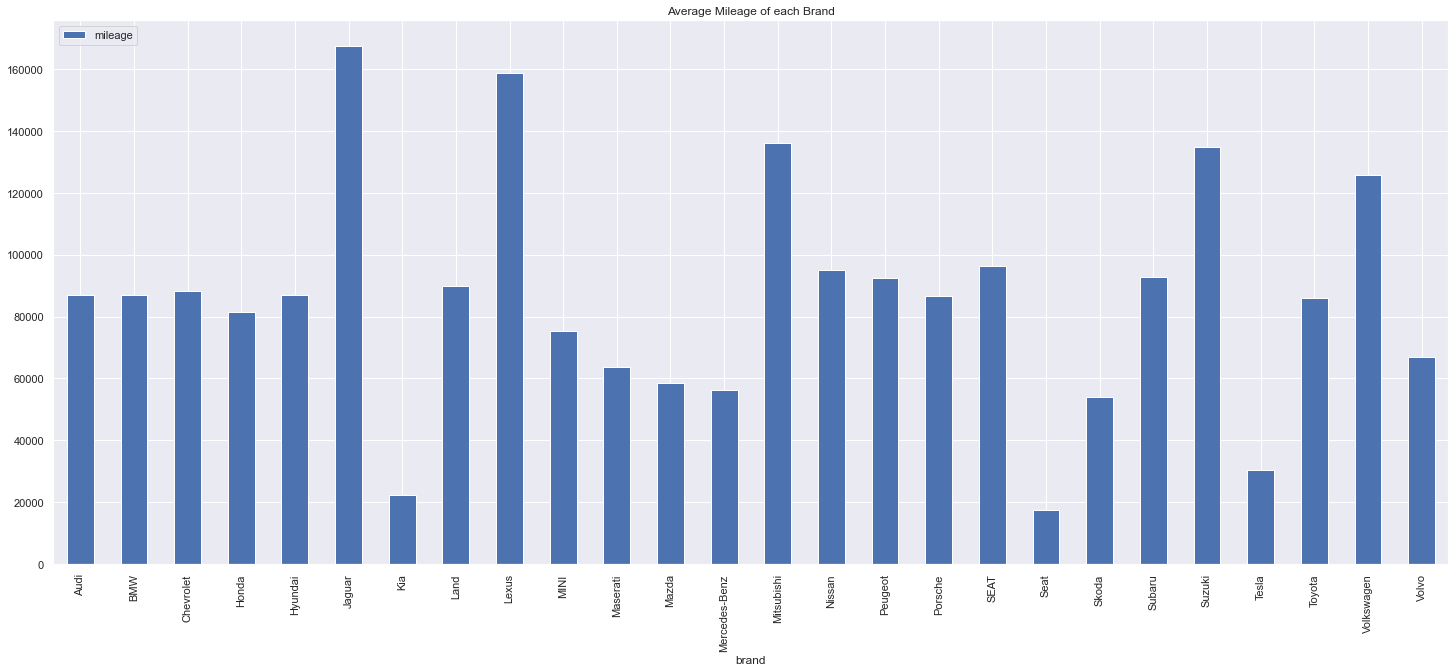

In [35]:
df.groupby('brand')['mileage'].mean().plot.bar()
plt.title('Average Mileage of each Brand')
plt.legend(loc="upper left")

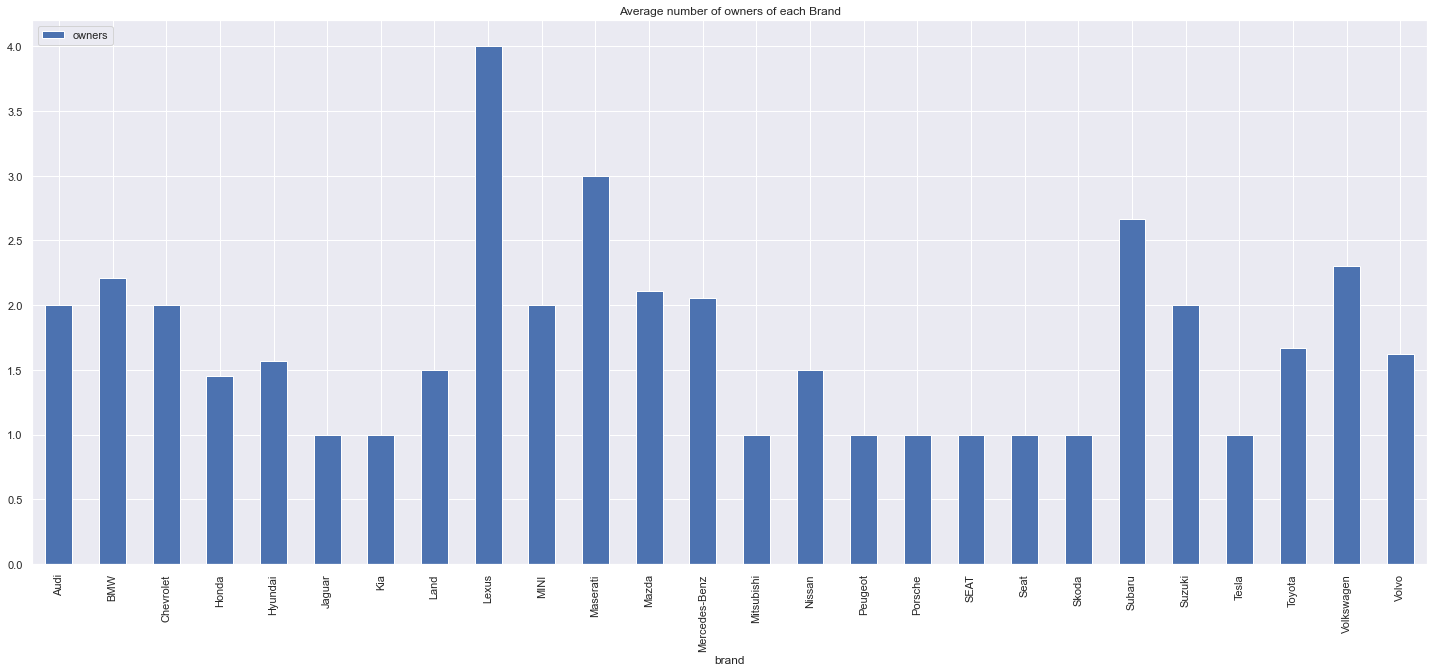

In [37]:
df.groupby('brand')['owners'].mean().plot.bar()
plt.title('Average number of owners of each Brand')
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Division of cars by number of owners')

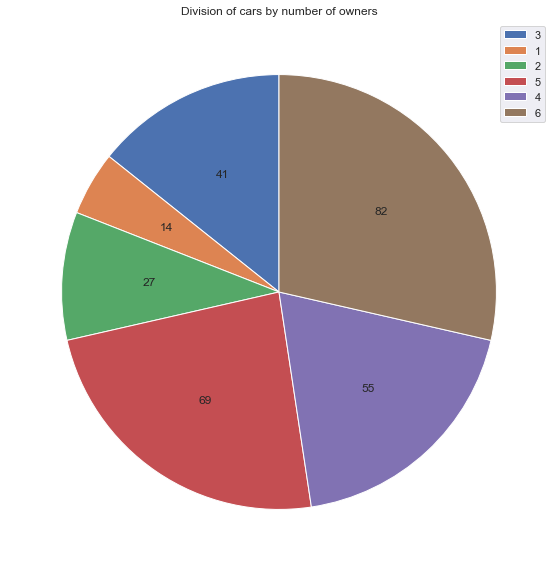

In [54]:
values=df['owners'].value_counts(dropna=True)
plt.pie(df.owners.unique(), autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
plt.legend(df.owners.unique())
plt.title('Division of cars by number of owners')


Text(0.5, 1.0, 'Division of cars by number of Brands')

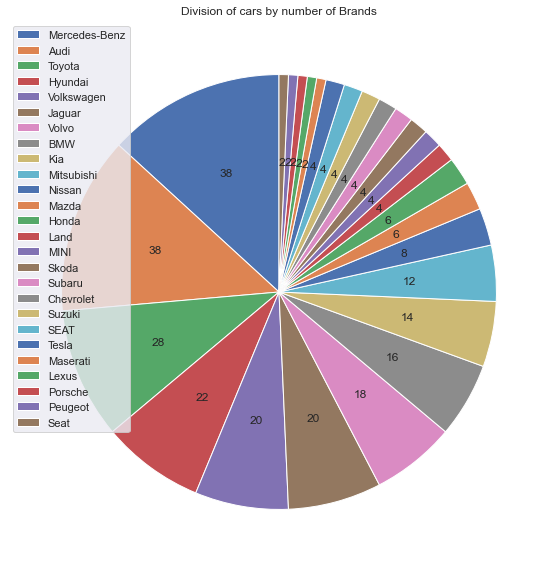

In [58]:
values=df['brand'].value_counts(dropna=True)
plt.pie(values, autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
plt.legend(df.brand.unique())
plt.title('Division of cars by number of Brands')

In [60]:
df.columns

Index(['index', 'id', 'brand', 'model', 'website', 'price', 'mileage',
       'owners', 'depreciation', 'reg_date', 'coe_left', 'link'],
      dtype='object')

In [70]:
#changing reg_date to datetime type
df.reg_date=pd.to_datetime(df.reg_date)

In [75]:
now = pd.to_datetime('now')
now
df['age']= (now.year - df['reg_date'].dt.year)

In [76]:
df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,reg_date,coe_left,link,age
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,2012-10-10,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,2016-08-24,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,6
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,2017-11-23,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7,5
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,2010-09-22,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,12
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,2020-10-15,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,2


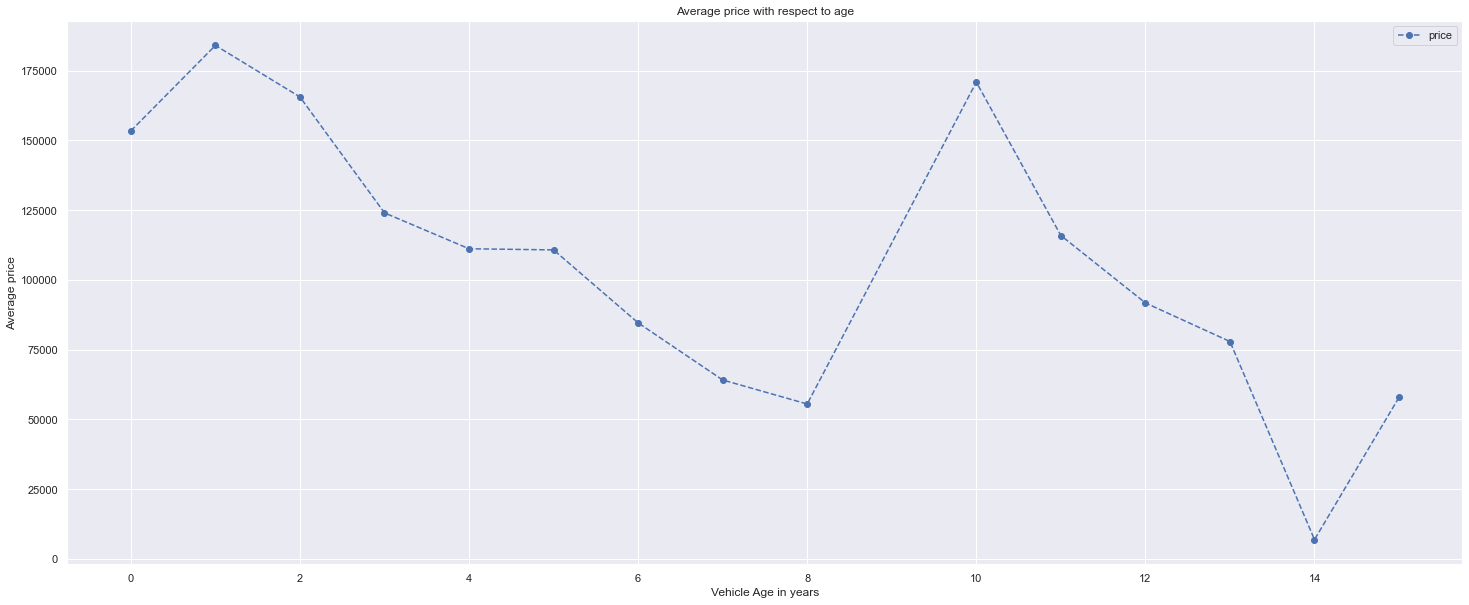

In [96]:

df.groupby('age')['price'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average price with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average price')
plt.legend()

In [79]:
df.columns

Index(['index', 'id', 'brand', 'model', 'website', 'price', 'mileage',
       'owners', 'depreciation', 'reg_date', 'coe_left', 'link', 'age'],
      dtype='object')

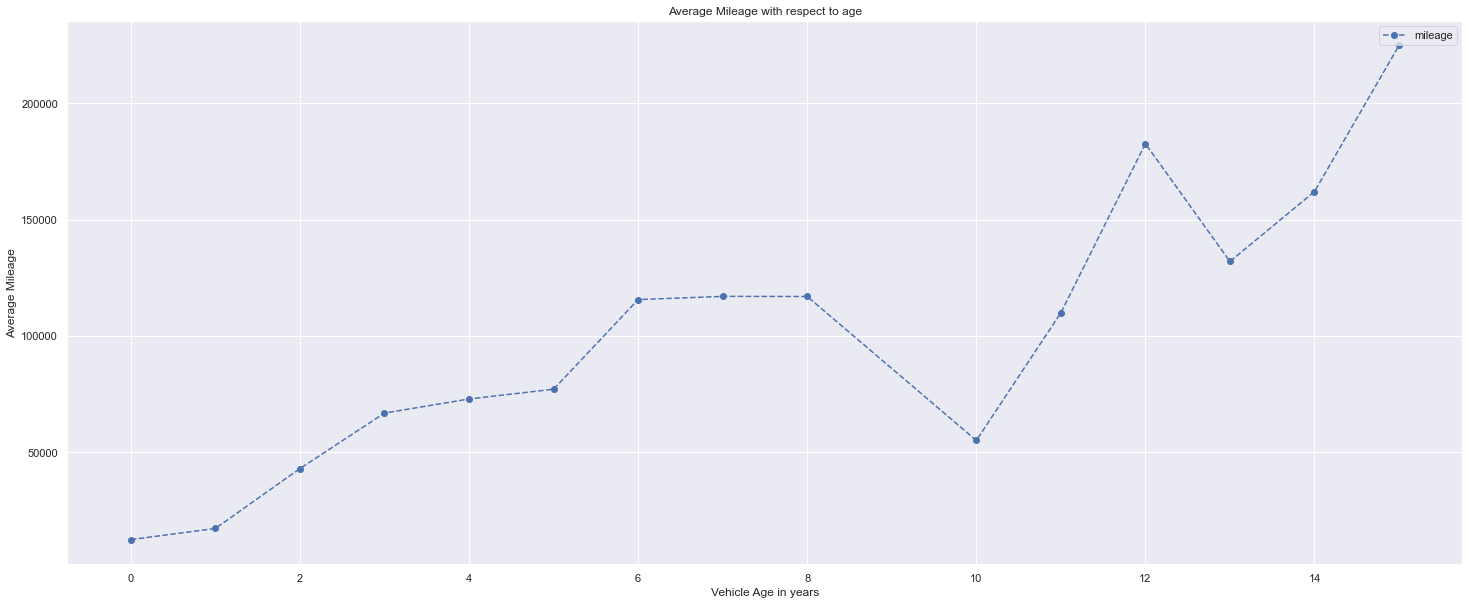

In [95]:
df.groupby('age')['mileage'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average Mileage with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average Mileage')
plt.legend()

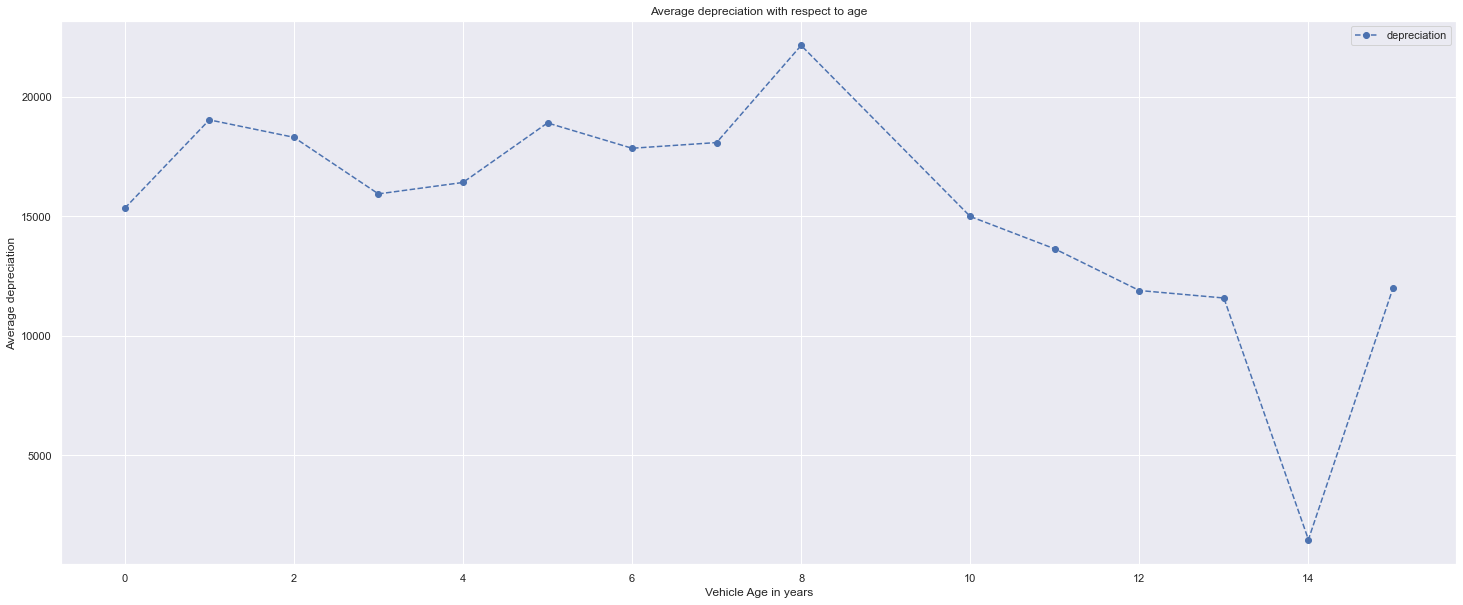

In [97]:
df.groupby('age')['depreciation'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average depreciation with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average depreciation')
plt.legend()

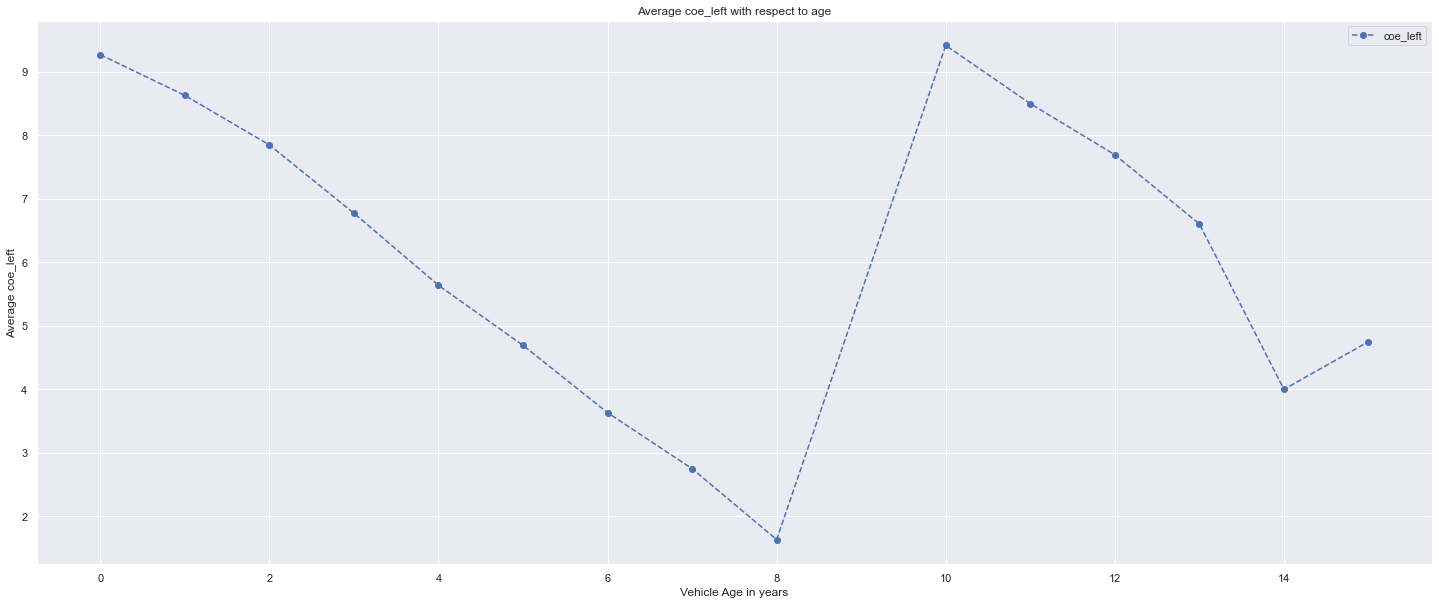

In [99]:
df.groupby('age')['coe_left'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average coe_left with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average coe_left')
plt.legend()

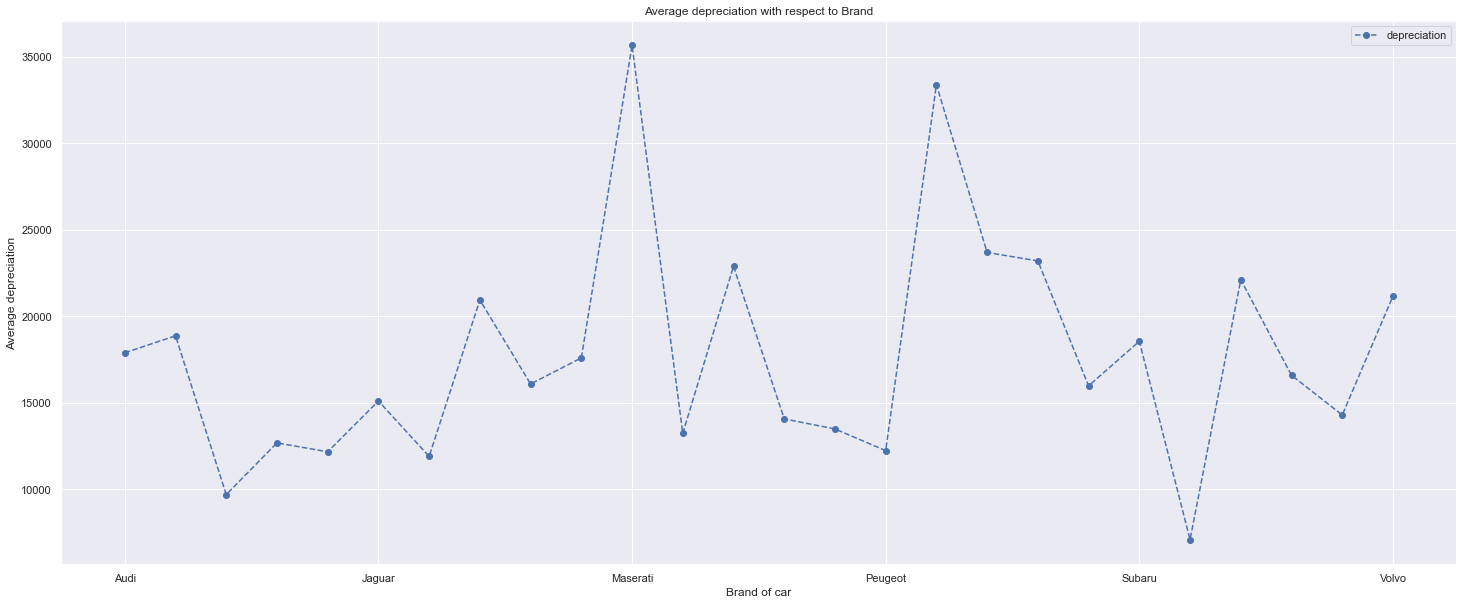

In [98]:
df.groupby('brand')['depreciation'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average depreciation with respect to Brand')
plt.xlabel('Brand of car')
plt.ylabel('Average depreciation')
plt.legend()

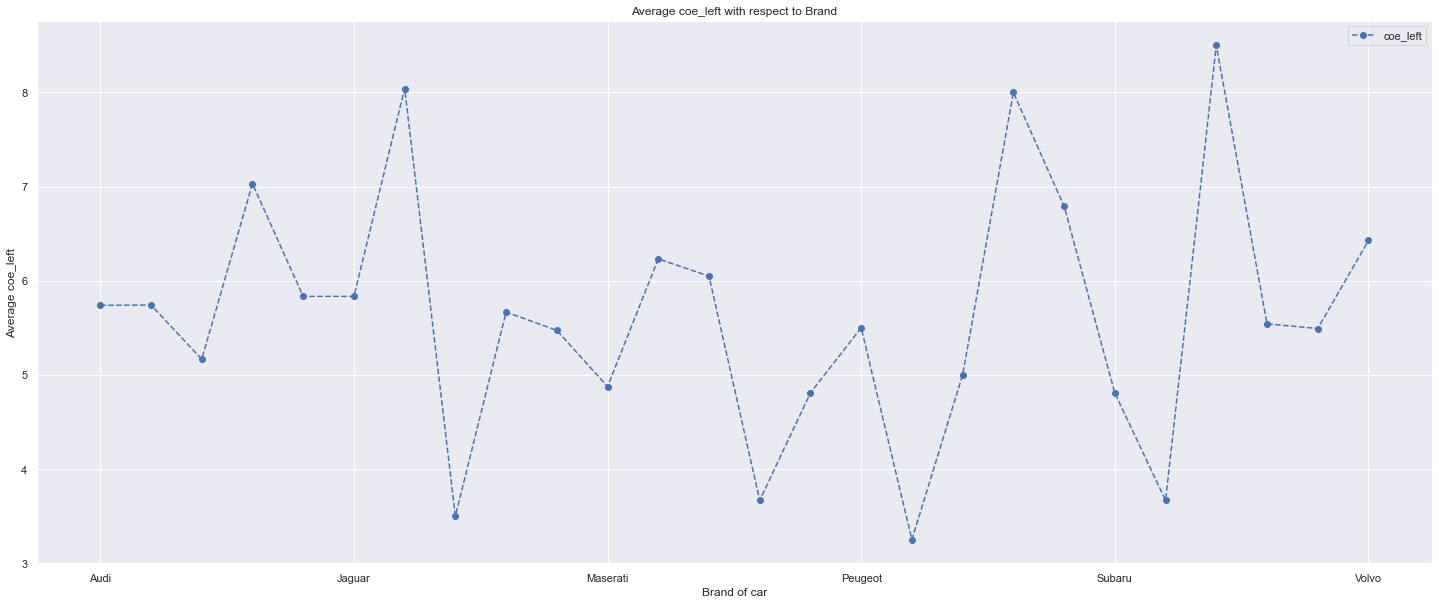

In [100]:

df.groupby('brand')['coe_left'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average coe_left with respect to Brand')
plt.xlabel('Brand of car')
plt.ylabel('Average coe_left')
plt.legend()

Text(0.5, 1.0, 'Division of cars by Age')

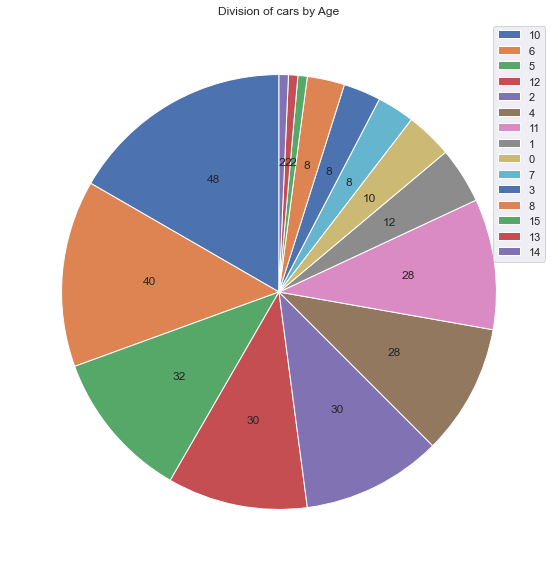

In [102]:
values=df['age'].value_counts(dropna=True)
plt.pie(values, autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
plt.legend(df.age.unique())
plt.title('Division of cars by Age')